In [4]:
# https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/

In [ ]:
import pandas as pd
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt
import eia

In [13]:
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    api: API that we're connected to
    series_ID: string. Name of the series that we want to pull from the EIA API
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df

In [14]:
#Create EIA API using your specific API key
api_key = '4717e9a23085c9645f53414269fc2728'
api = eia.API(api_key)

In [15]:
#Pull the oil WTI price data
series_ID='PET.RWTC.D'
price_df=retrieve_time_series(api, series_ID)
price_df.reset_index(level=0, inplace=True)
#Rename the columns for easier analysis
price_df.rename(columns={'index':'Date',
            price_df.columns[1]:'WTI_Price'}, 
            inplace=True)
#Format the 'Date' column 
price_df['Date']=price_df['Date'].astype(str).str[:-3]
#Convert the Date column into a date object
price_df['Date']=pd.to_datetime(price_df['Date'], format='%Y %m%d')
#Subset to only include data going back to 2014
price_df=price_df[(price_df['Date']>='2014-01-01')]

#Convert the time series values to a numpy 1D array
points=np.array(price_df['WTI_Price'])

In [16]:
points

array([95.14, 93.66, 93.12, ..., 52.87, 53.16, 53.  ])

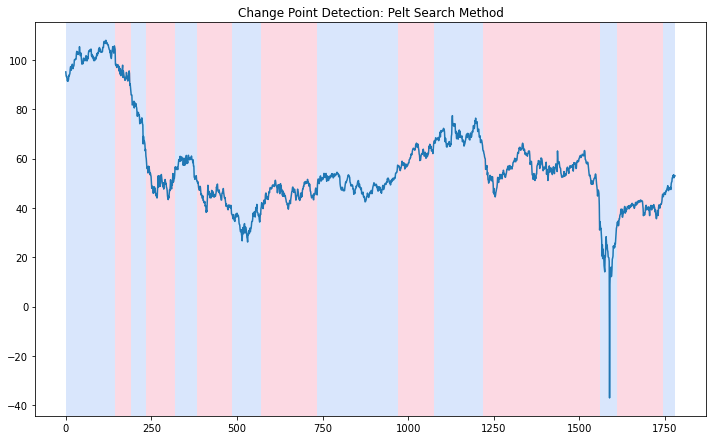

In [7]:
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

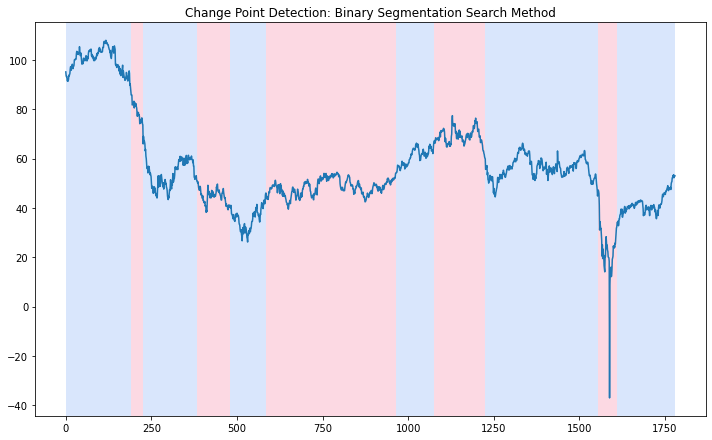

In [8]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

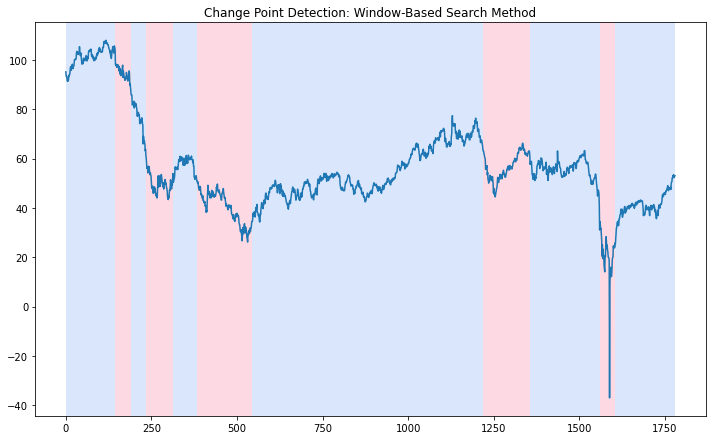

In [9]:
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

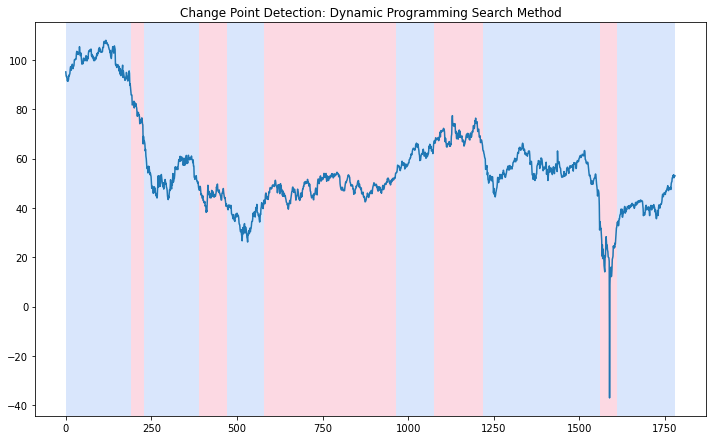

In [10]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()